# PCA Using Eigen Decomposition

### Import the required libraries

In [27]:
import numpy as np
from numpy.linalg import eig

### Create a matrix contains the following data

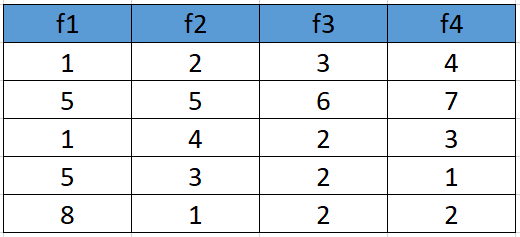

In [6]:
a=np.array([[1,2,3,4],[5,5,6,7],[1,4,2,3],[5,3,2,1],[8,1,2,2]])
a

array([[1, 2, 3, 4],
       [5, 5, 6, 7],
       [1, 4, 2, 3],
       [5, 3, 2, 1],
       [8, 1, 2, 2]])

## Step 1: Standardize the dataset.

### Define a function to calculate data mean.
#### Hint: do not use np.mean() built in function. However, you can use np.sum().

In [34]:
def calc_mean(mat):
    mean=np.sum(mat,axis=0)/(len(mat))
    return mean
    

### Check your function on the first and second features

In [35]:
calc_mean(a)

array([4. , 3. , 3. , 3.4])

In [36]:
calc_mean(a[:,3])

3.4

### Define a function to calculate standard deviation of the data.
#### Hint: do not use np.std() built in function. However, you can use np.sum().

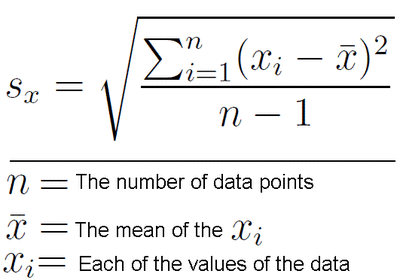

In [37]:
def std_calc_n_1(mat):
    mean = calc_mean(mat)
    diff = mat - mean
    diff_sq = np.power(diff,2)
    sum_col = np.sum(diff_sq,axis=0)
    std = np.sqrt((1/(len(mat)-1))*sum_col)
    return std

### Check your function on the given features

In [38]:
std_calc_n_1(a)

array([3.        , 1.58113883, 1.73205081, 2.30217289])

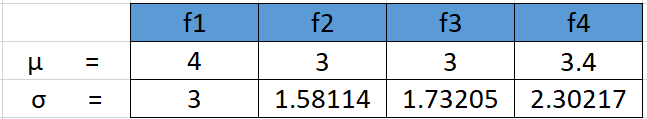

### Define a function to standardize the dataset.

In [39]:
def standarize(mat):
    mean = calc_mean(mat)
    std=std_calc_n_1(mat)
    normalized_data = (mat - mean)/std
    return normalized_data


### Use your function to standardize the data

In [40]:
standarize(a)

array([[-1.        , -0.63245553,  0.        ,  0.26062335],
       [ 0.33333333,  1.26491106,  1.73205081,  1.56374007],
       [-1.        ,  0.63245553, -0.57735027, -0.1737489 ],
       [ 0.33333333,  0.        , -0.57735027, -1.04249338],
       [ 1.33333333, -1.26491106, -0.57735027, -0.60812114]])

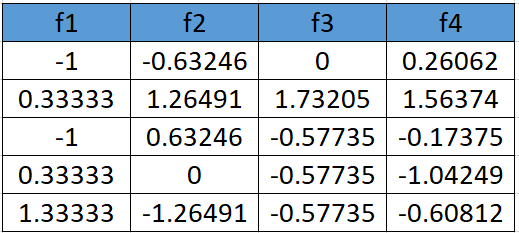

## Step 2: Calculate the covariance matrix for the features in the dataset.

### Calculate covariance matrix using the formula: 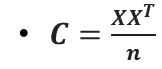
##### This formula is used because the data has <b>zero</b> mean and <b>1</b> standard deviation.
<b>Note:</b> with respect to this formula our matrix is already transposed <b>(5*4)</b>

In [41]:
def calc_cov_mat(mat):
    z = standarize(mat)
    cov=(z.T @ z)/len(mat)
    return cov
calc_cov_mat(a)

array([[ 0.8       , -0.25298221,  0.03849002, -0.14479075],
       [-0.25298221,  0.8       ,  0.51120772,  0.49449803],
       [ 0.03849002,  0.51120772,  0.8       ,  0.75235479],
       [-0.14479075,  0.49449803,  0.75235479,  0.8       ]])

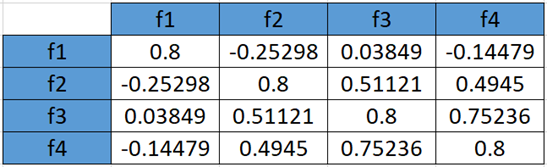

## Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.
## Step 4: Sort eigenvalues and their corresponding eigenvectors.

### Find eigen values and the corresponding eigen vectors for the covariance matrix
#### You can use NumPy built in function for this purpose 

In [42]:
cov1=calc_cov_mat(a)
eig_val,eig_vec=eig(cov1)
print(eig_val,"\n",eig_vec)

[2.01263459 0.8522308  0.31510964 0.02002497] 
 [[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


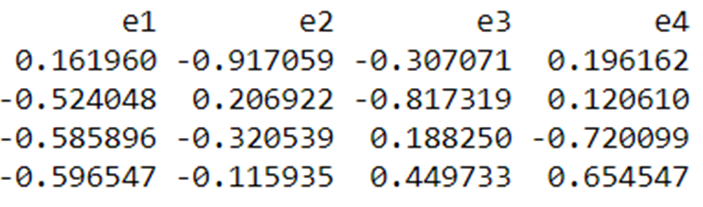

## Step 5: Pick k eigenvalues and form a matrix of eigenvectors.

### Select the first eigen vectors

In [43]:
k=2
selected = eig_vec[:,0:k]
print(selected)

[[ 0.16195986 -0.91705888]
 [-0.52404813  0.20692161]
 [-0.58589647 -0.3205394 ]
 [-0.59654663 -0.11593512]]


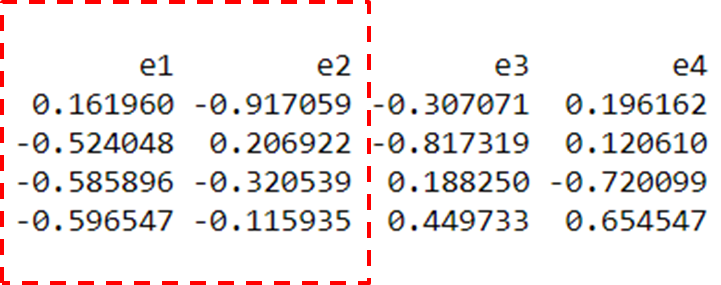

## Step 6:Transform the original matrix.

In [33]:
z=standarize(a)
selected = eig_vec[:,0:k]
t=z@selected
print(t)

[[ 1.40033078e-02  7.55974765e-01]
 [-2.55653399e+00 -7.80431775e-01]
 [-5.14801919e-02  1.25313470e+00]
 [ 1.01415002e+00  2.38808310e-04]
 [ 1.57986086e+00 -1.22891650e+00]]


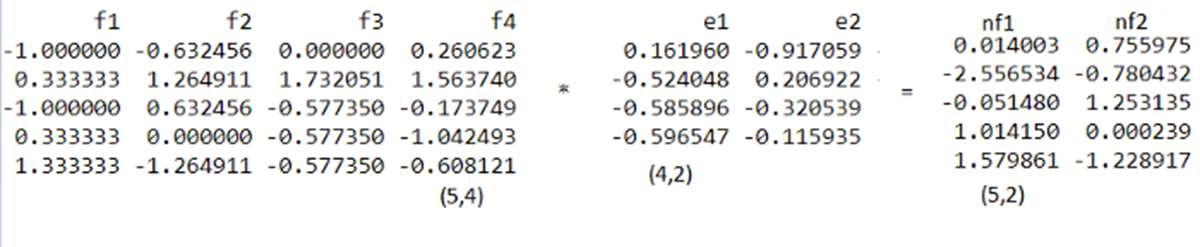

## Congratulations 
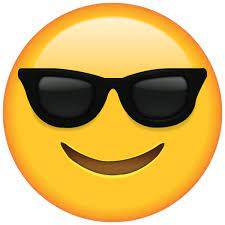